# QSB282 Bioinformatics Lab Assignment 3: Data Cleaning Control and Plotting

Corresponds to lectures 3 and 4. Find them on CatCourses.

Lecture 3
: Data Science I: Data Cleaning and Control with UNIX, Perl, Python, and R

Lecture 4
: Data Science II: Data Summarization and Plotting in UNIX, R, and Python

**This is the first assignment in which you will generate the output of your code cells to include as part of your assignment. This assignment requires code cells to execute in BASH and Python. I recommend that you run the notebook with the Python Kernel, and use magics to run specific cells in BASH (that is, start a BASH cell with the magic `%%bash`). Unlike for previous assignments, I recommend developing your command-lines interactively within the notebook. ** 
For more information on how to do this, see https://evodify.com/python-r-bash-jupyter-notebook/

# Instructions to Complete this Assignment

1. Enter your name on this line: Songtao Ye
1. Enter the names of those who helped you on this assignment: Ruihao Li, Ben Hwang, and Sarina Qin
1. Answer as many of the questions as you can,
1. Upload your `.ipynb` **and** your `.html` for your Jupyter Notebook, and the `.Rmd` and `.html` for your RStudio R Notebook, in catcourses under **Assignment 3**. 

# UNIX command-lines without Perl one-liners

## Baby Names Data

### Download the data
Uncomment and run the following perl one-liner to download the baby names data for all decades. Do this by pressing `shift-enter` in the following code cell. To run the code, you need to have the command `wget` on your system.

**Note:** This code demonstrates how to use perl for automation using the `system` command.
**Caution!** Automating tasks can be dangerous to your data/filesystem/computer unless you are sure the code that you are automating is correct. Always prototype and test a one-liner like this first, by substituting the command `system` with the command `print` and running it before you run the real thing.

In [21]:
%%bash 
#perl -e 'for(0..13) {$Y=1880 + ($_*10); system "wget \"https://www.ssa.gov/OACT/babynames/decades/names${Y}s.html\"\n"}'

### Finding the Order of Files Matched by a Shell Glob
In order to extract and combine the babyname data across decades efficiently and easily, we need to know the order in which the downloaded files will be processed when you refer to them with a shell glob. Check the `man` page for `ls` to find the option to list the filenames matched by a glob, one file per line, and then use this option with a shell glob to list the files in the matched order, to verify that the files get listed in order of decade.

In [39]:
%%bash
ls *[1880-2010]*.html 

names1880s.html
names1890s.html
names1900s.html
names1910s.html
names1920s.html
names1930s.html
names1940s.html
names1950s.html
names1960s.html
names1970s.html
names1980s.html
names1990s.html
names2000s.html
names2010s.html


### Using UNIX Text Utilities to Extract Baby Names Data Over All Decades
Install the command `lynx` if you don't have it on your system. Inspect the plain-text layout of one of the downloaded baby names HTML files using *e.g.* the command `lynx -dump names1880s.html | less` **(Take note of how many top baby-names are reported for any decade)**. Write a single UNIX command pipe-line starting with `lynx -dump` that converts the HTML files to text, uses a regular expression to extract just the lines containing the actual baby-names data from all 14 HTML file by order of decade. In addition, your command pipe-line should cut the leading white-space from each line, delete commas inside the numbers, convert spaces into tabs, and save the result to the file `babynames_all.txt`. (Note: you cannot easily use `head` or `tail` to process the data-stream because of how the files are concatenated).

In [151]:
%%bash
lynx -dump *[1880-2010]*.html|grep -E '^\W+\d+\W+\w+\W\d+.*\W\d'|cut -c 4-|tr -d ","|tr ' ' '\t'> babynames_all.txt  
#perl -pe 's/^\h+//g;s/[,]//g;s/\h+/\t/g' > babynames_all.txt does the same thing

### Verify the Extraction Worked as Expected
Write a UNIX command to count the lines in `babynames_all.txt` to make sure that the result matches the number of lines expected, which is the number of top baby-names reported per decade times the number of decades for which there is data. **(In addition, you don't need to show this work, but you should always inspect the data. Page through the file, or use `head` and `tail` to verify that the top lines contain "old" names and the bottom contains "new" names)*

In [132]:
%%bash
wc -l babynames_all.txt

    2800 babynames_all.txt


### Label the Data by Decade of Origin
Uncomment and modify the code in the next cell so it prints the decades sorted numerically from 1880 to 2010. Modify and run again to ensure it has the correct number of lines. Then modify one last time to save the output to the file `decades.txt.` **(You may get an error message** `stty: stdin isn't a terminal` **, but don't worry about it)**.

In [133]:
%%bash
tcsh
repeat 200 seq 1880 10 2010|sort -n > decades.txt
wc -l decades.txt

    2800 decades.txt


### Augmenting a Flat-File Database
Write a UNIX pipeline to combine `decades.txt` and `babynames_all.txt` line-by-line, in effect pre-pending the decade labels to the babynames data, using the default TAB-character as a delimiter, and save it to a new file called `babynames_labelled_all.txt`. 

In [135]:
%%bash
paste -d "\t" decades.txt babynames_all.txt >babynames_labelled_all.txt

### Trend Data for a Given Name
Write a valid UNIX pipeline to print the decade, rank and name for any top-ranked boy's or girl's name over all decades in which it appears.

In [294]:
%%bash
#For boys:
cat babynames_labelled_all.txt|grep -w 'Michael'|awk '{print $1,$2,$3}'
#For grils:
cat babynames_labelled_all.txt|grep -w 'Jane'|awk '{print $1,$2,$5}'
#perl -ne 'print "$1$3\n" if /(\d+\s\d+\s)(\w+\s+\d+\s+)?(Jane)/' does the samething,but much specific and easier


1880 50 Michael
1890 54 Michael
1900 45 Michael
1910 44 Michael
1920 52 Michael
1930 35 Michael
1940 9 Michael
1950 2 Michael
1960 1 Michael
1970 1 Michael
1980 1 Michael
1990 1 Michael
2000 2 Michael
2010 7 Michael
1880 99 Jane
1890 117 Jane
1900 137 Jane
1910 68 Jane
1920 56 Jane
1930 47 Jane
1940 40 Jane
1950 51 Jane
1960 92 Jane


### How many unique boys’ names are in the top 200 baby-names over all thirteen decades?

In [75]:
%%bash
cat babynames_labelled_all.txt|sort -k4 -rn|head -200|cut -f 3|sort|uniq|wc -l

      53


### How many unique girls’ names contain two consecutive e’s or a’s?

In [103]:
%%bash
cat babynames_labelled_all.txt|cut -f5|grep -E -i "aa|ee"|sort|uniq|wc -l

      16


### How many unique names (considering girls’ and boys’ names together) are in the top 200 babynames from all fourteen decades?

In [66]:
%%bash
cut -f 3,5 babynames_labelled_all.txt|tr '\t' '\n'|sort|uniq|wc -l
#perl -ne 'while (/(\w+\h+\d+)\h+(\w+\h+\d+)/g){print "$1\n$2\n"}' does the same thing as tr 

    1205


### How many names were top-ranking for both boys and girls in the same decade during the 1960s (HINT this exploits another option to uniq)? Call these “bi-gender names”.

In [102]:
%%bash
cat babynames_labelled_all.txt|grep -E '^1960'|cut -f 3,5|tr -s '\t' '\n'|sort|uniq -d > bi-gender_names.txt
#perl -ne 'while (/(\w+)\h+(\w+)/g){print "$1\n$2\n"}' does the same thing as tr

Kelly
Leslie
Terry
Tracy


## Hacking a Table from a PDF Document
For this exercise, download the PDF file of a paper from the *Journal of Molecular Biology* by authors Dong, Nilsson and Kurland and name it `DongEtAl96.pdf.` Install the `xpdf` package on your system, to provide the command `pdftotext`. Run `pdftotext -layout -enc UTF-8 DongEtAl96.pdf` to generate the file `DongEtAl96.txt`. Write a UNIX pipeline that extracts only the first and last columns of Table 2 from `DongEtAl96.txt` so that the two columns are in a text table separated by whitespace.

In [239]:
%%bash
cat DongEtA196.txt|head -309|tail -93|awk '{print $1"  "$NF}'

  
Ala1B  5.04
  
Ala2  0.95
  
Arg2  7.37
  
Arg3  0.99
  
Arg4  1.34
  
Arg5  0.65
  
Asn  1.85
  
Asp1  3.72
  
Cys  2.46
  
Gln1  1.18
  
Gln2  1.36
  
Glu2  7.32
  
Gly1a  24
  
Gly2  3.31
  
Gly3  6.76
  
His  0.99
  
Ile1  5.39
  
Ile2a  13
  
Leu1  6.94
  
Leu2  1.46
  
Leu3  1.03
  
Leu4  2.97
  
Leu5  1.60
  
Lys  2.97
  
Met  1.88
  
Met  1.11
  
Met  1.09
  
Phe  1.60
  
Pro1  1.38
  
Pro2  1.11
  
Pro3  0.90
  
Sec  0.34
  
Ser1  2.01
  
Ser2  0.53
  
Ser3  2.18
  
Ser5  1.18
  
Thr1  0.16
  
Thr2  0.84
  
Thr3  1.70
  
Thr4  1.42
  
Trp  1.46
  
Tyr1  1.19
  
Tyr2  1.95
  
Val1  5.96
  
Val2A  0.97
  
Val2B  0.98
  


# Perl One-Liners

## Global Substitution (Using `perl` like `sed`)

### Missing Data
Download and expand the "full SOFT" DataSet Record `GDS115` from the Microarray data repository at GEO/NCBI. Which columns contain the log-ratio expression data? What word is used to indicate missing data? Many software packages use `NA` to indicate missing data. Write a perl one-liner to substitute all occurrences of missing data to read `NA`.

In [149]:
%%bash
cat GDS115_full.soft|grep -E '^\d+'|perl -pe 's/EMPTY/NA/g;s/null/NA/g'> ystt.txt
# Columns, SM1075 GSM1076 GSM1090 GSM1077 and GSM1078 contain log-rario data
# Empty and null are used to indicate the missing data


## Filtering Data by Numerical Values
The file `actd.csv` courtesy of Dr. Dana Burow of the Cleary lab, contains normalized Affymetrix microarray data for *Drosophila* over a time-course, with expression values in the third through fifth columns for t = 0, 1 and 3 hours. Unfortunately, an artifact of normalization has yielded negative and zero-valued expression values for some of the spots at t = 3 hours. Write a perl one-liner to filter the data, so as to print only those lines in the file that have positive expression values at t = 3 hrs. Count lines to make sure you haven't lost any data.

In [7]:
%%bash
cat actd.csv|perl -F',' -ane 'print if ($F[-3]>=0);'|wc -l

   25213


## Subsetting and Filtering Data by Numerical Values
Modify your answer to the previous question so as to print only the Ref-Numbers for those spots with negative and zero-valued expression values at t = 3 hours.

In [13]:
%%bash
cat actd.csv|perl -F',' -ane 'print "$F[0]\n" if ($F[-3]<=0);'

RefNumber
43303
42869
29522
20929
481
18460
11608
33631
44757
42913
1765
40422
37769
492
17973
14892
9322
13009
36021
44061
35340
44635
32900
37898
42104
37177


## Controlling the number of fields per record
Well-formed flatfile databases should always have the same number of fields for each record. Write a perl one-liner that computes the number of fields on any line in `actd.csv` using `scalar (@F)`, and then pipes this to one or more other UNIX commands so that each unique number of fields for any line is printed only once.

In [10]:
%%bash
perl -F"," -alne 'print scalar(@F)' actd.csv|sort|uniq

7


## Commenting Records
A different approach to filtering data is to "comment out" the lines that fail some criterion, like including negative expression values. For example, one could prefix all the lines that have zero or negative expression values at t = 3 hours with a `#` character (not appearing elsewhere in the file), which would make it easy to remove those lines with a grep command later. Write a perl-one-liner to "comment out" (*i.e.* add a `#` at the beginning of) all lines that have zero or negative expression values at t = 3 hours. Use shell-redirection to save this to the new file `actd_comment.csv`

In [137]:
%%bash 
cat actd.csv|perl -F',' -ape 'print "#$1" if ($F[-3]<=0);'> actd_comment.csv

## Efficient Regular Expressions
Write a memory-efficient Perl-formatted regular expression that matches a line if it contains a quotation bracketed by double-quotation marks. The quotation may be empty as in `""` Your regular expression should match literal double-quotation marks at both the beginning and end of the string and quoted strings except those containing a quoted double-quotation mark.

/^"[^""]*"$/


# Summarizing and Plotting Data with Pandas Dataframes in Python
To solve the following problems refer to the book *Python for Data Analysis, 2nd Edition* on Safari Proquest at https://proquest.safaribooksonline.com/book/programming/python/9781491957653

## Importing the Pandas library
What is some code to import the pandas library into the environment of this notebook, and give it the alias `pd`?
See [Chapter 5. Getting Started with pandas](https://proquest.safaribooksonline.com/book/programming/python/9781491957653/firstchapter#X2ludGVybmFsX0h0bWxWaWV3P3htbGlkPTk3ODE0OTE5NTc2NTMlMkZwYW5kYXNfc3VtbWFyaXplX2h0bWwmcXVlcnk9KChweXRob24lMjBkYXRhKSk=)

In [245]:
import pandas as pd

## Initializing a Pandas DataFrame from a CSV file
What is code to read in the `actd.csv` file you worked with before, a CSV-formatted flat-file database, and use its data to initialize a pandas DataFrame object called `df`?
(The file `actd.csv` contains a header line that uses spaces in the names of fields/columns. This makes it difficult to select columns by their names later, when you plot the data. In order to easily select columns of the DataFrame later, you will want to rename the fields from how they are named in the file. To do this, pass the options `header=None,skiprows=1,names=['refnum','name','pulse','chase1hr','chase3hr','genename','tophit'])` to the class method you use to read the file). 
See [6.1 Reading and Writing Data in Text Format](https://proquest.safaribooksonline.com/book/programming/python/9781491957653/firstchapter#X2ludGVybmFsX0h0bWxWaWV3P3htbGlkPTk3ODE0OTE5NTc2NTMlMkZpb19mbGF0X2ZpbGVzX2h0bWwmcXVlcnk9KChweXRob24lMjBkYXRhKSk=)

In [198]:
df = pd.read_csv("actd.csv",header=None,skiprows=1,names=['refnum','name','pulse','chase1hr','chase3hr','genename','tophit'])
df

,refnum,name,pulse,chase1hr,chase3hr,genename,tophit
0,5901,AT01131,2002,422,85.76,AT01131,dgc|AT01131|gb|BT011567|tc|TC208615
1,29553,AT02348,43443,20105,8256.00,AT02348,dgc|AT02348|gb|AY089228
2,12848,AT02388,2919,975,101.12,AT02388,dgc|AT02388|gb|AY089232
3,43738,AT03386,7401,2032,231.68,AT03386,dgc|AT03386|gb|AY084095|tc|TC212064
4,44077,AT03646,3652,849,226.56,AT03646,dgc|AT03646|gb|AY089251
...,...,...,...,...,...,...,...
25231,18516,EL886204,64434,44417,43558.40,EL886204,ug|EL886204
25232,30816,EL886370,641,221,128.00,EL886370,ug|EL886370
25233,38587,EL886429,1216,671,128.00,EL886429,ug|EL886429
25234,5279,EL886714,2930,1105,849.92,EL886714,ug|EL886714


## Inspecting a Pandas DataFrame
What is code to pretty-print the top five records of the pandas DataFrame `df`?
See [Data Frame](https://proquest.safaribooksonline.com/book/programming/python/9781491957653/getting-started-with-pandas/pandas_html#X2ludGVybmFsX0h0bWxWaWV3P3htbGlkPTk3ODE0OTE5NTc2NTMlMkZwYW5kYXNfZGF0YWZyYW1lX2h0bWwmcXVlcnk9aGVhZA==)

In [100]:
df.head()

,refnum,name,pulse,chase1hr,chase3hr,genename,tophit
0,5901,AT01131,2002,422,85.76,AT01131,dgc|AT01131|gb|BT011567|tc|TC208615
1,29553,AT02348,43443,20105,8256.00,AT02348,dgc|AT02348|gb|AY089228
2,12848,AT02388,2919,975,101.12,AT02388,dgc|AT02388|gb|AY089232
3,43738,AT03386,7401,2032,231.68,AT03386,dgc|AT03386|gb|AY084095|tc|TC212064
4,44077,AT03646,3652,849,226.56,AT03646,dgc|AT03646|gb|AY089251


## Summary Statistics for Numerical Columns of a Pandas DataFrame
What single function is useful to get multiple summary statistics on all numeric data columns in the DataFrame `df`?
See [5.3 Summarizing and Computing Descriptive Statistics](https://proquest.safaribooksonline.com/book/programming/python/9781491957653/firstchapter#X2ludGVybmFsX0h0bWxWaWV3P3htbGlkPTk3ODE0OTE5NTc2NTMlMkZwYW5kYXNfc3VtbWFyaXplX2h0bWwmcXVlcnk9KChweXRob24lMjBkYXRhKSk=)

In [101]:
df.describe()

,refnum,pulse,chase1hr,chase3hr
count,25236.000000,25236.000000,25236.000000,25236.000000
mean,22916.575844,15009.836702,6109.390751,3104.028100
std,12802.863530,17743.270387,10820.826294,9372.956694
min,12.000000,600.000000,46.000000,-42.240000
25%,11918.750000,2167.000000,771.000000,273.920000
50%,23054.500000,7346.500000,2347.500000,801.280000
75%,34106.500000,20842.250000,6368.000000,2293.760000
max,45004.000000,65359.000000,65333.000000,83612.160000


## Selecting columns from a Pandas DataFrame by name
How do you select and return only the fields/columns `pulse`,`chase1hr`,`chase3hr` from the DataFrame `df`?

In [142]:
df.loc[:,['pulse','chase1hr','chase3hr']]

,pulse,chase1hr,chase3hr
0,2002,422,85.76
1,43443,20105,8256.00
2,2919,975,101.12
3,7401,2032,231.68
4,3652,849,226.56
...,...,...,...
25231,64434,44417,43558.40
25232,641,221,128.00
25233,1216,671,128.00
25234,2930,1105,849.92


## Plotting Densities and Pairwise Scatterplots from a Pandas DataFrame Using Seaborn 
See [Scatter or Point Plots] (https://proquest.safaribooksonline.com/book/programming/python/9781491957653/firstchapter#X2ludGVybmFsX0h0bWxWaWV3P3htbGlkPTk3ODE0OTE5NTc2NTMlMkZ2aXNfcGFuZGFzX3NwbG9tX2h0bWwmcXVlcnk9cGFpcnBsb3Q=)
Make a Seaborn pairplot from the DataFrame `df` for the three fields `pulse`,`chase1hr`,`chase3hr` in three steps: import seaborn, allow inline plotting to your notebook with the magic command `%matplotlib inline`, and then pass `df` with only the three selected fields/columns `pulse`,`chase1hr`,`chase3hr` to the Seaborn class method that produces a pairplot. Experiment (by editing the cell and re-running with shift-enter) with passing additional parameters `diag_kind='kde', plot_kws={'alpha': 0.2}` to the plotting class method.

In [154]:
# import and magic statement here
import seaborn as sns
%matplotlib inline




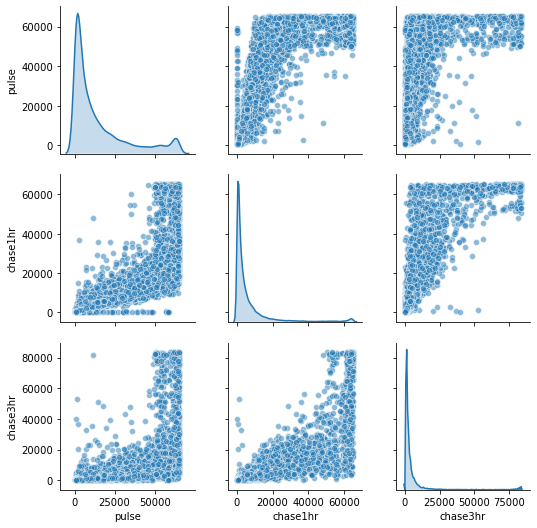

In [159]:
# seaborn plot command here
hw3= df.loc[:,['pulse','chase1hr','chase3hr']]
sns.pairplot(hw3,diag_kind='kde',plot_kws={'alpha': 0.5})

# Introduction to Reading and Plotting data in R
Download and install RStudio. 

## Make an R Notebook
Open a New Project and associate it with your existing working directory for this homework.  After the project opens, open *New File $\rightarrow$ R Notebook*. Press the "play" green button triangle in the existing code chunk to make it generate an inline plot in your notebook. Then, at the top of the notebook, replace:

```
---
title: "R Notebook"
output: html_notebook
---
```

with

```
---
title: "QSB 282 Assignment 3"
author: "Your Name"
date: "`r format(Sys.time(), '%d %B, %Y')`"
output:
  html_document:
    highlight: tango
    number_sections: yes
    theme: united
    toc: yes
    toc_depth: 4
  pdf_document:
    number_sections: yes
    toc: yes
  word_document:
    toc: yes
editor_options:
  chunk_output_type: inline
---
```

## Add a Plot
Down in the console of Rstudio, enter the command `demo (graphics)`. Hit `<return>` to page through different kinds of plots. Notice the code for the plots appears in the console. Pick a plot that you like, and copy-and-paste its code to generate that plot into a new code chunk at the end of your notebook. 

## Make a Scatterplot of Letter Frequencies from Two Different Books And Add it To Your R Notebook
Modify the UNIX pipeline shown in "Converting One-Liners into Shell Scripts" from *Data Science at the Command Line*, by replacing the `grep` component with a Perl one-liner that splits all lines into characters, and prints all characters one per line, eventually filtering out all non-alphabetical characters so that the one-liner prints the frequencies of all 26 letters of the alphabet. Run your pipeline on two different books from the Gutenberg project, and save the results to two files. Use markdown to document the titles of the books you analyzed. Using either UNIX, R or a combination, find a way to integrate (combine) the frequency data for the two books over two columns in a table with rows for letters and columns for books, with a header that labels the books with a single string for each, and import this frequency table into R using the `read.table()` or `read.csv()` functions, ending up with an R data-frame that looks like:

| letter  |  book1-label | book2-label  |
|---|---|---|
| a  |  freq-a-1 |  freq-a-2 |
| b  |  freq-b-1 |  freq-b-2 |
| c  |  freq-c-1 |  freq-c-2 |

Now, in a new code chunk in your R Notebook, make a scatterplot of the frequency data for the two books. Then using a subsequent call to the `text()` function, label the points wth their corresponding letters. Export your notebook to HTML using the Knit button. 


In [267]:
%%bash
curl -s https://www.gutenberg.org/files/60326/60326-0.txt |tr '[:upper:]' '[:lower:]'|grep -oE '[a-zA-Z]+'|perl -ne 'print join("\n", split //, $_)'|sort|uniq -c|sort -nr|tail -n 26|sort -k2|grep -oE '\d+'> gutenbery1.csv
#The book is Maradick at Forty A Transition and the frequencies are saved in file
curl -s https://www.gutenberg.org/files/60319/60319-0.txt |tr '[:upper:]' '[:lower:]'|grep -oE '[a-zA-Z]+'|perl -ne 'print join("\n", split //, $_)'|sort|uniq -c|sort -nr|tail -n 26|sort -k2|grep -oE '\d+'> gutenbery2.csv
#The book is Jerusalem, the City of Herod and Saladin and the frequencies are saved in file
echo {a..z}|tr " " "\n" >letter.csv
#create another file with a-z to labelled combined file
paste letter.csv gutenbery1.csv gutenbery2.csv|tr "\t" "," > gutenbery_all_labelled.csv
#combine all the files

a,49190,60604
b,9018,11621
c,12048,21376
d,27857,34189
e,74196,99873
f,11276,19929
g,12644,13819
h,41518,50583
i,38568,50385
j,718,1806
k,6338,4528
l,25622,27989
m,14592,19248
n,40036,51033
o,42635,55912
p,8352,14195
q,573,757
r,31378,47979
s,36822,48576
t,56869,71542
u,16946,19919
v,5102,6686
w,15621,16626
x,581,1138
y,13445,13007
z,196,400


In [269]:
fd1= pd.read_csv("gutenbery_all_labelled.csv",names=['Letter','Book1:MFT','Book2:JCHS'])
fd1

,Letter,Book1:MFT,Book2:JCHS
0,a,49190,60604
1,b,9018,11621
2,c,12048,21376
3,d,27857,34189
4,e,74196,99873
5,f,11276,19929
6,g,12644,13819
7,h,41518,50583
8,i,38568,50385
9,j,718,1806
